In [1]:
#IMPORTS & LOADING DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
#DATA OVERVIEW

print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

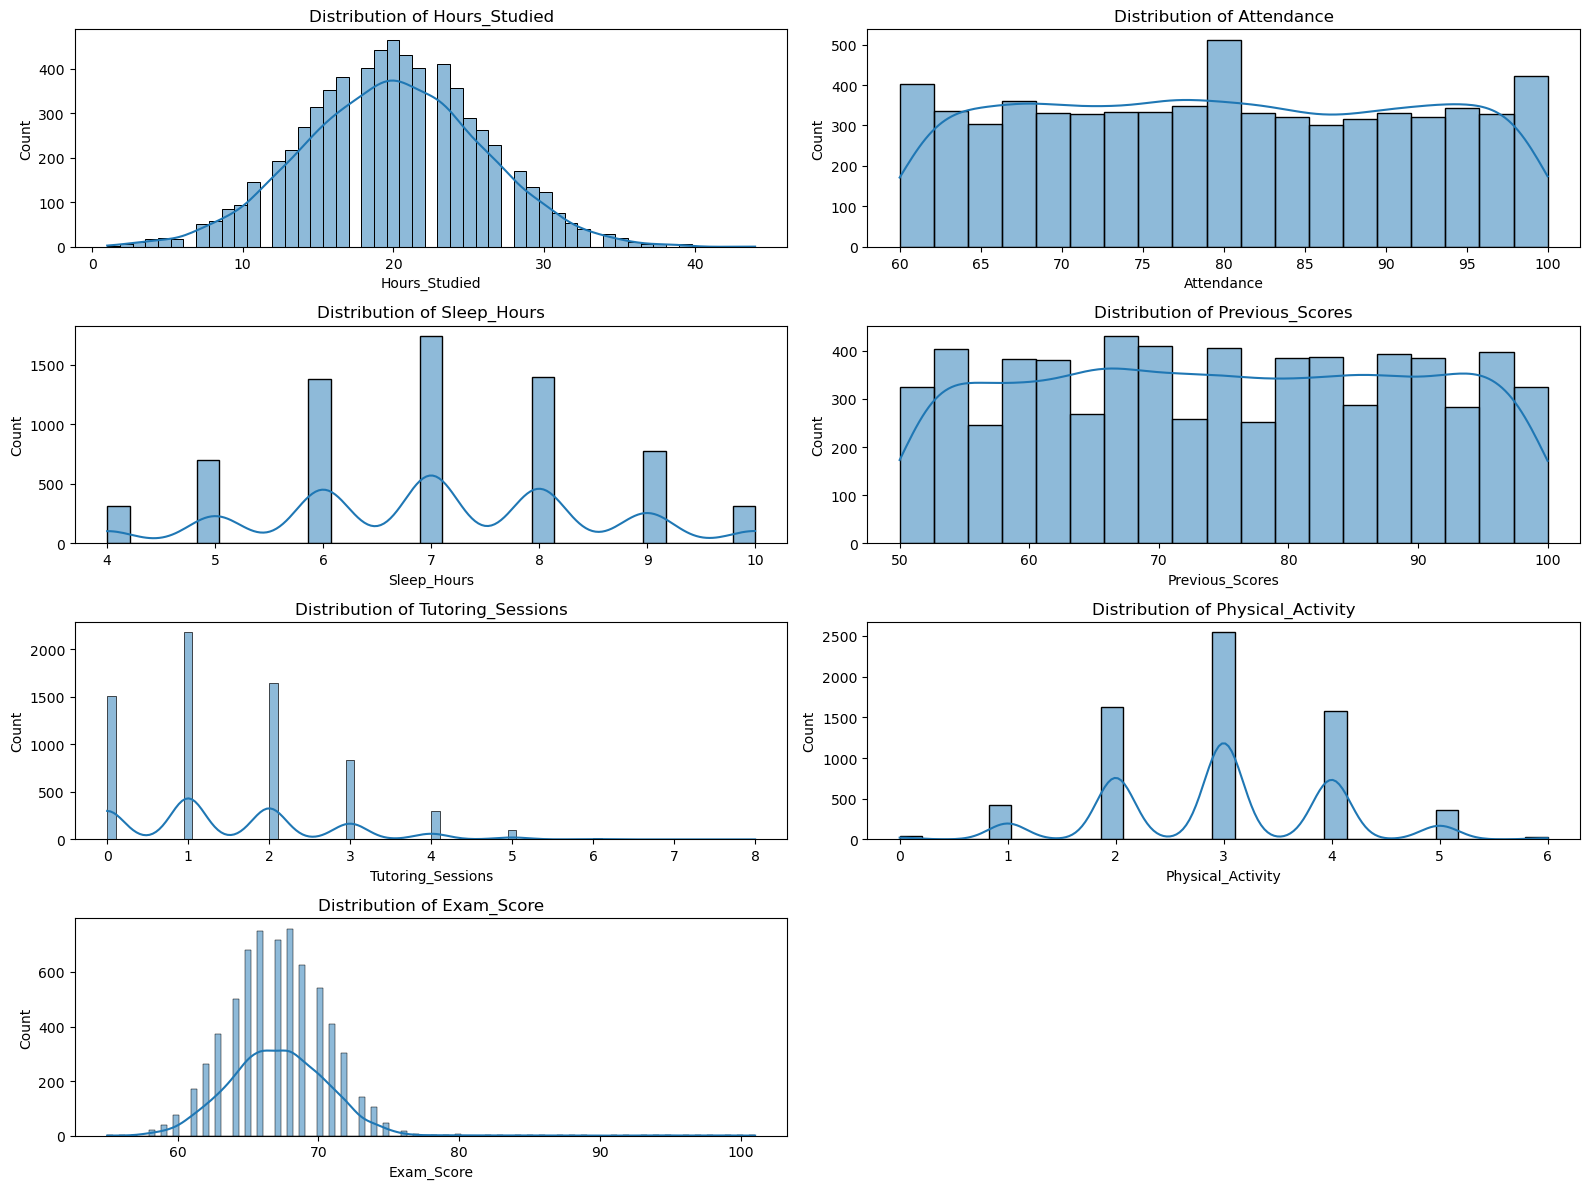

In [3]:
#DISTRIBUTIONS OF NUMERICAL FEATURES

num_cols = [
    "Hours_Studied", "Attendance", "Sleep_Hours",
    "Previous_Scores", "Tutoring_Sessions",
    "Physical_Activity", "Exam_Score"
]

plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


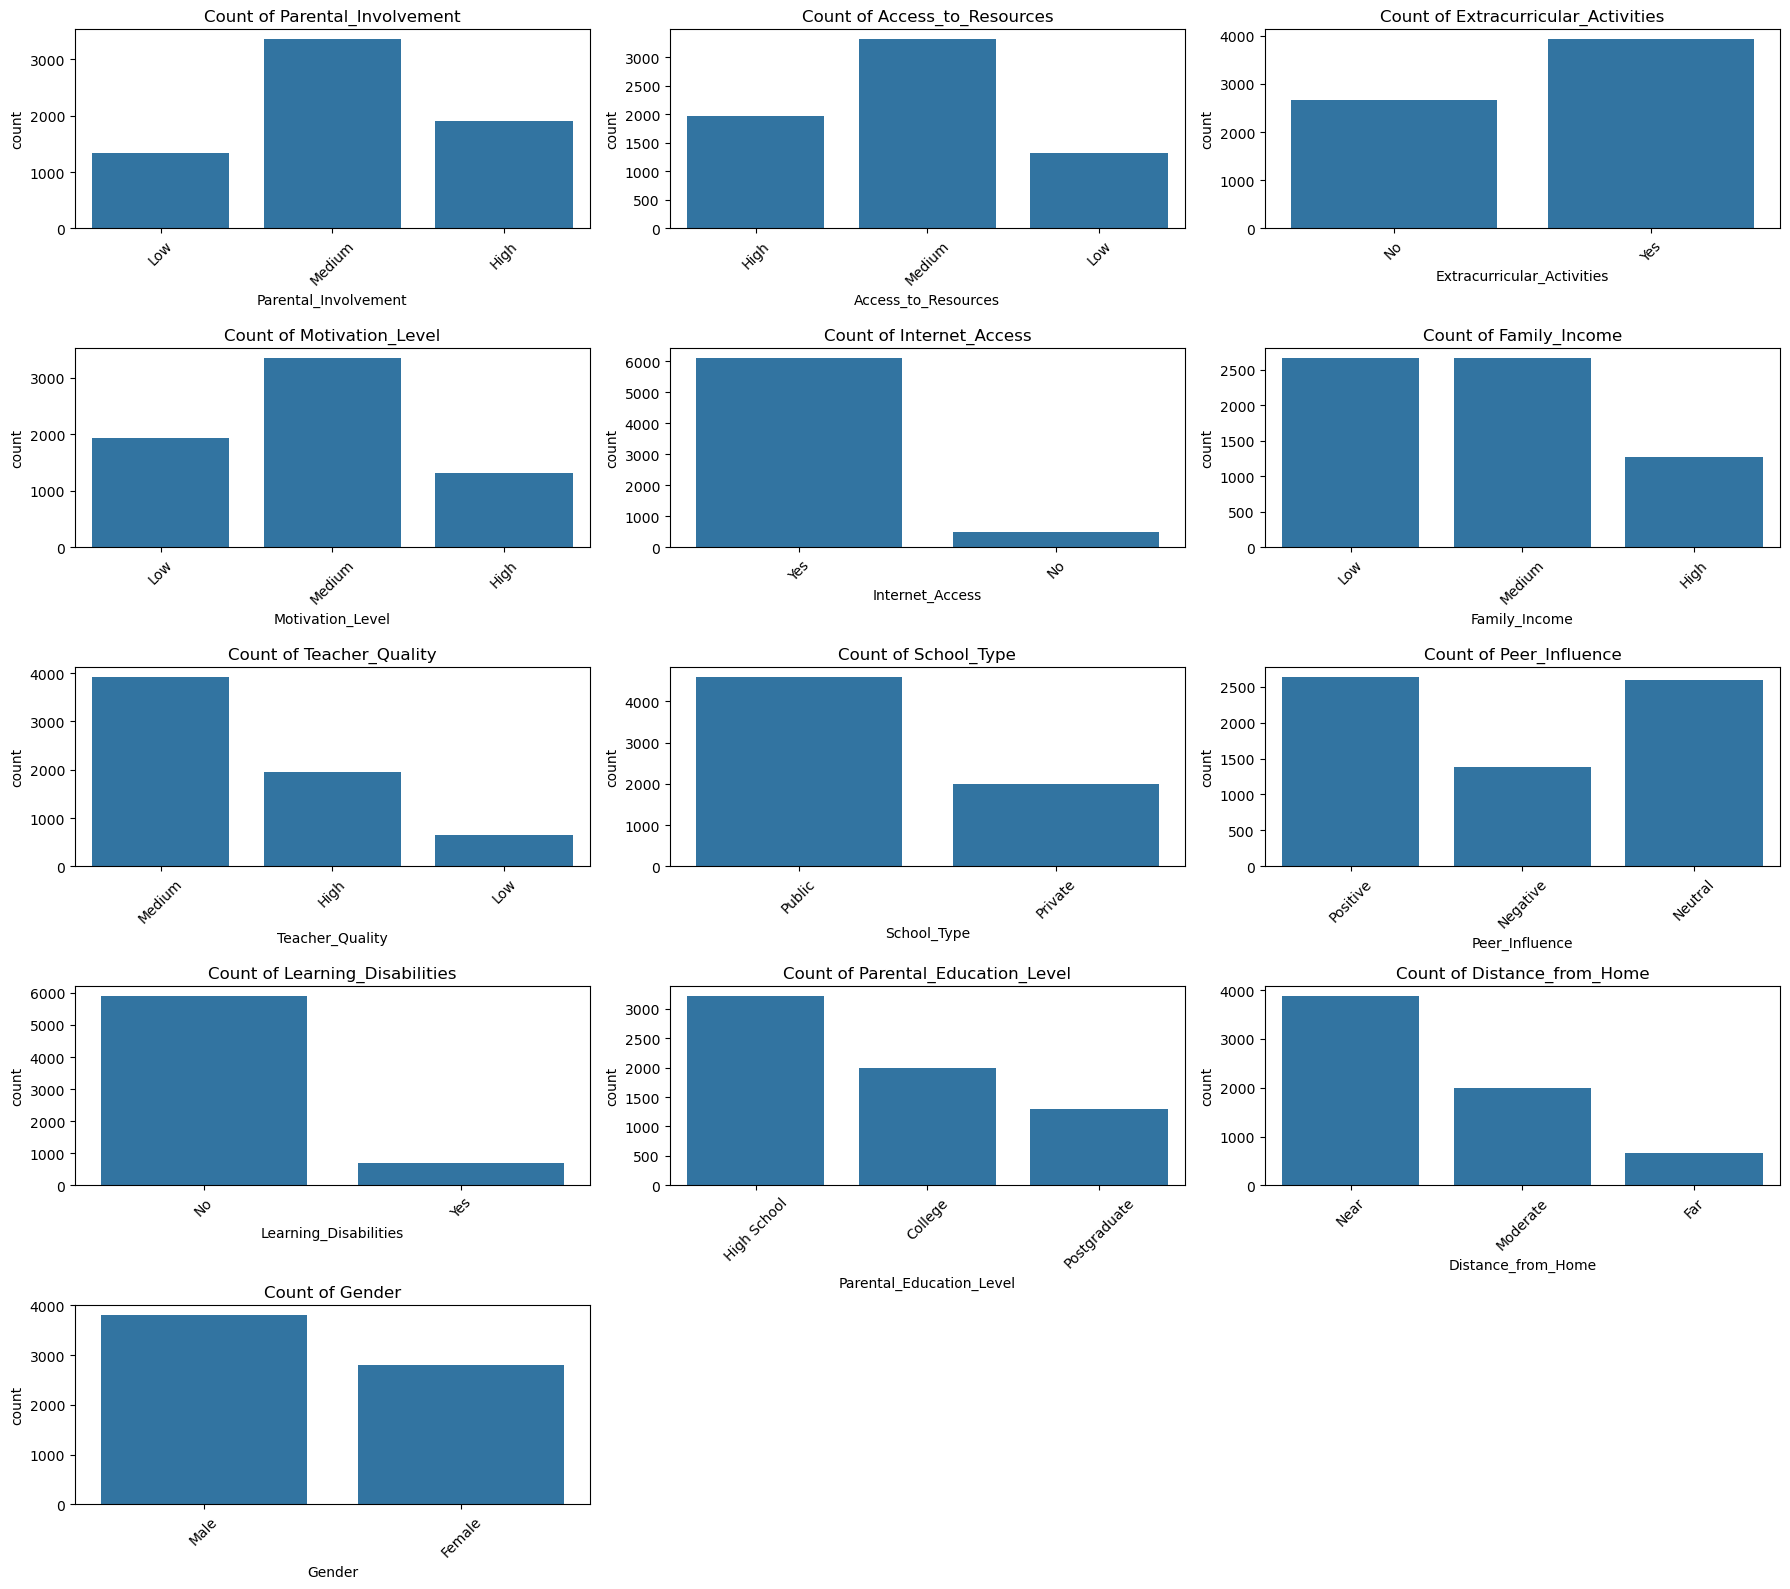

In [4]:
#DISTRIBUTION OF CATEGORICAL FEATURES

cat_cols = [
    "Parental_Involvement", "Access_to_Resources",
    "Extracurricular_Activities", "Motivation_Level",
    "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

plt.figure(figsize=(18,16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()


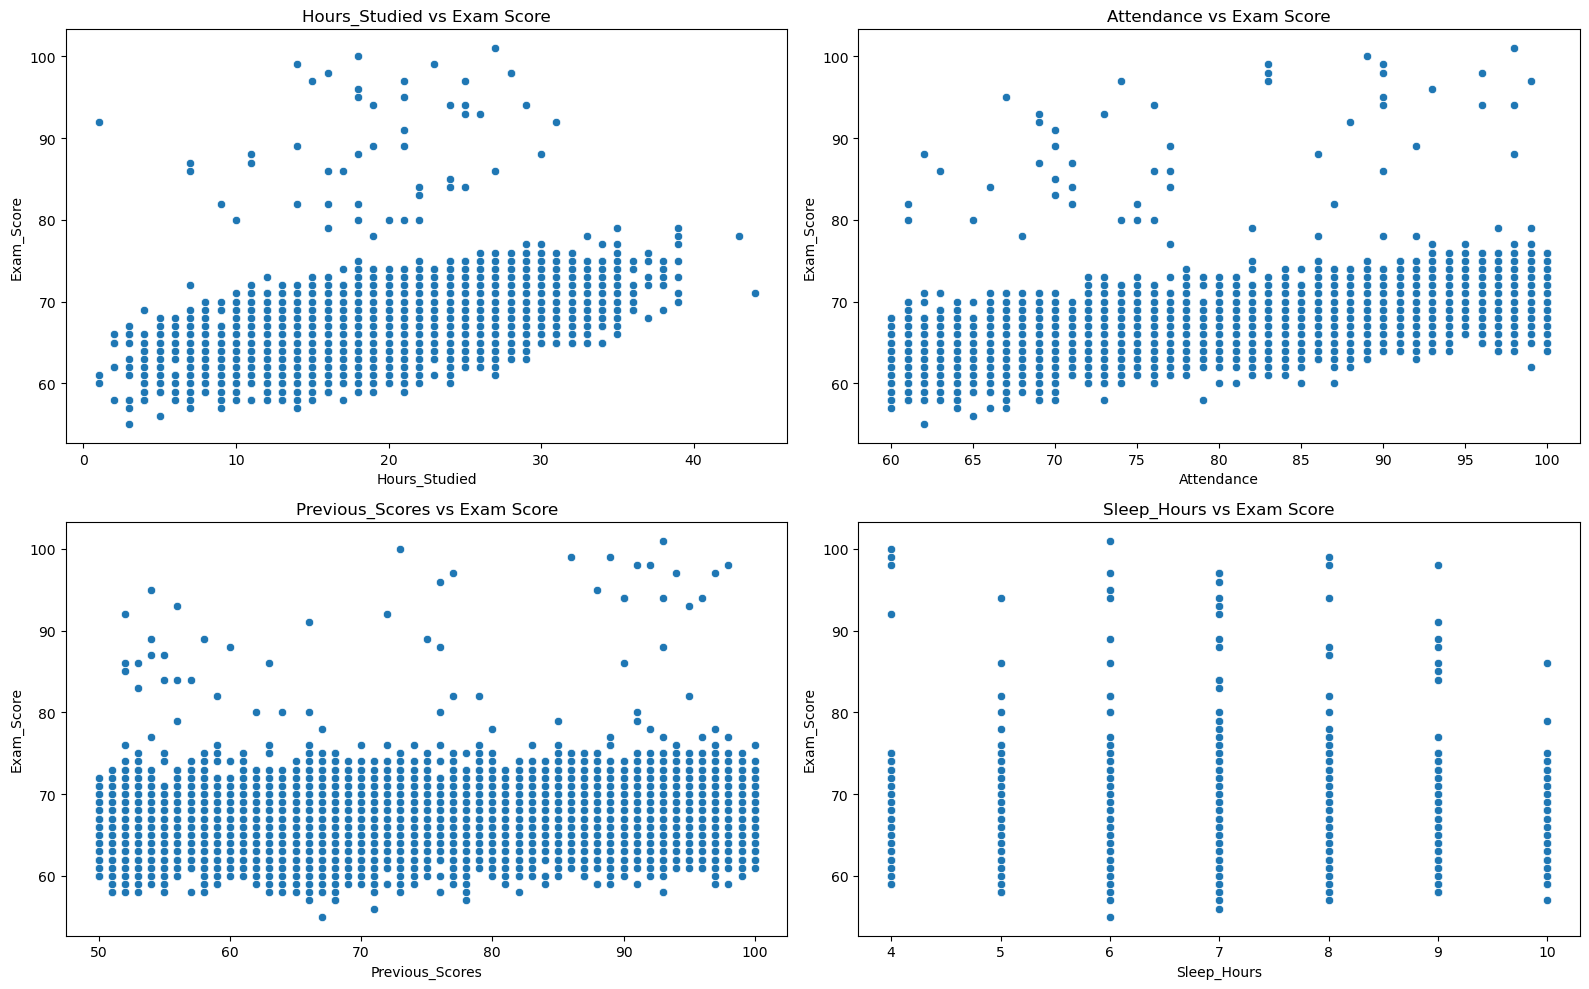

In [5]:
#SCATTER PLOTS
plt.figure(figsize=(16,10))
for i, col in enumerate(["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours"], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y="Exam_Score")
    plt.title(f"{col} vs Exam Score")
plt.tight_layout()
plt.show()


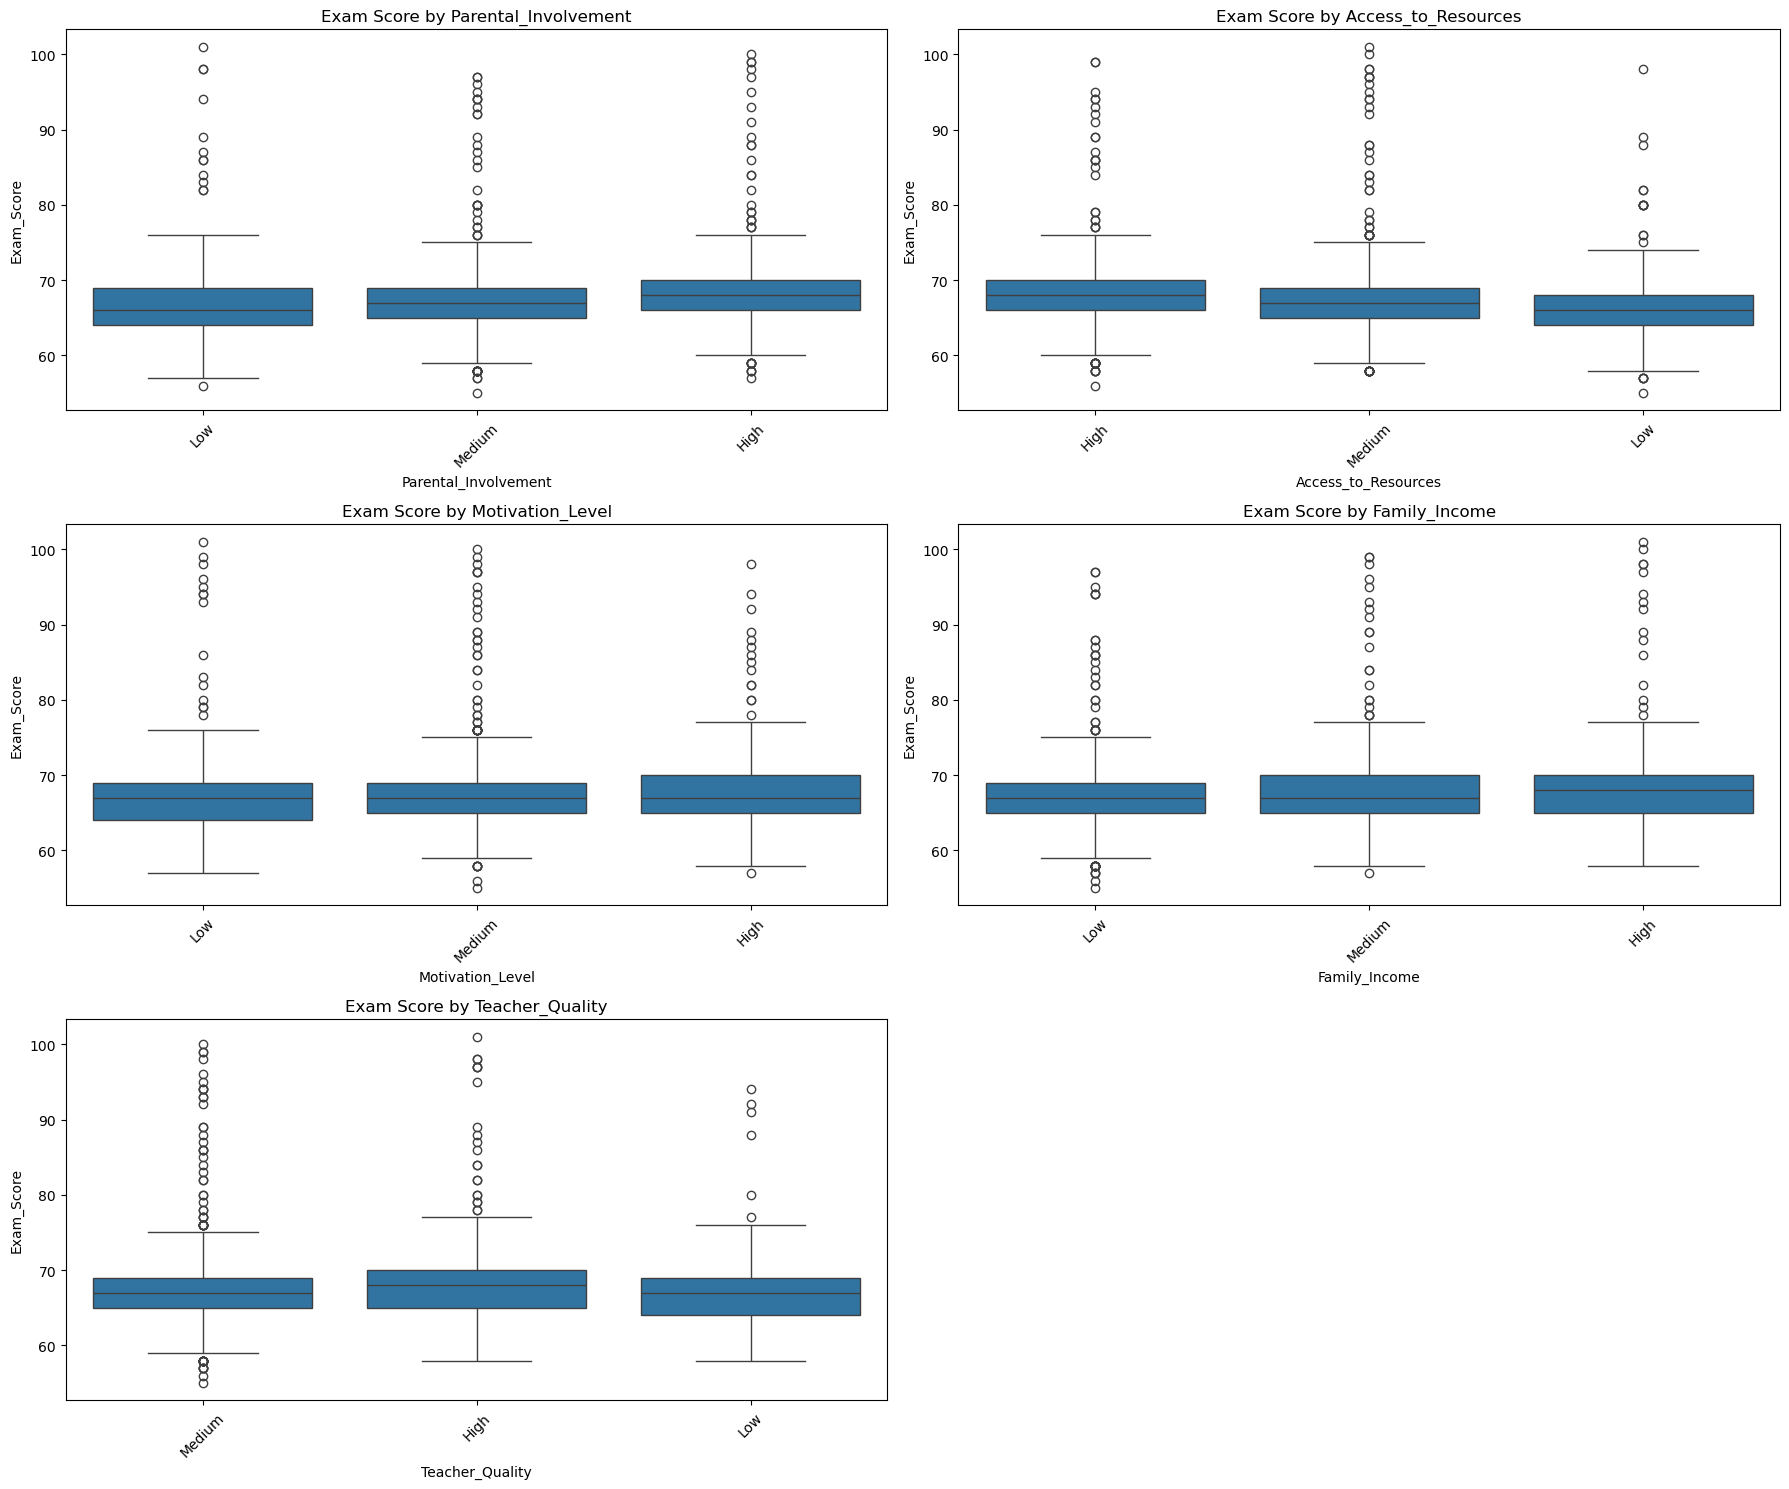

In [6]:
#BOX PLOTS
plt.figure(figsize=(18,15))
for i, col in enumerate(["Parental_Involvement", "Access_to_Resources", "Motivation_Level",
                         "Family_Income", "Teacher_Quality"], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=col, y="Exam_Score")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


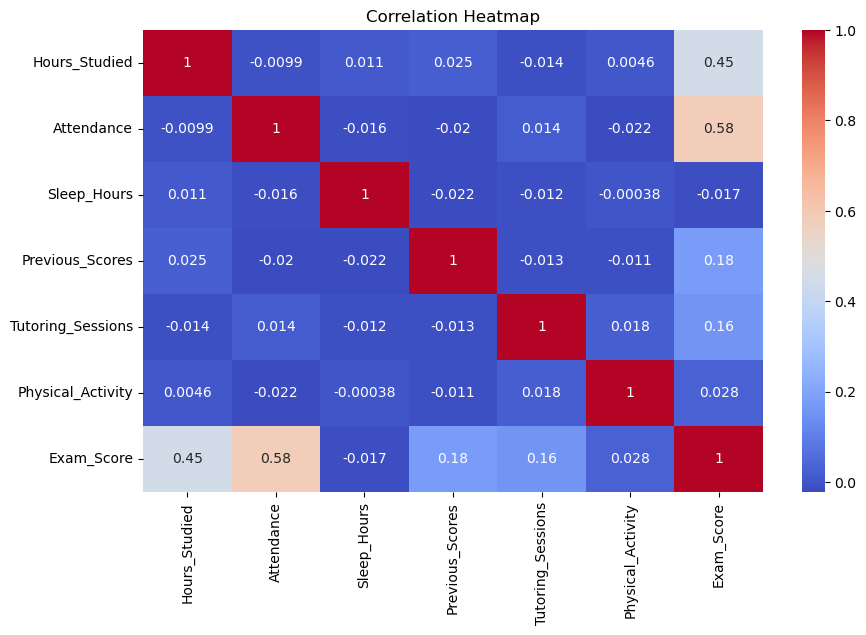

In [7]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
